In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

# List of required columns
required_columns = ['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']

# Load the CSV
df = pd.read_csv(
    'q_quora.csv',
    usecols=required_columns,
    dtype={'id': int, 'qid1': int, 'qid2': int, 'question1': str, 'question2': str, 'is_duplicate': str},
    on_bad_lines='skip',         # skips badly formatted lines (Pandas 1.3+)
    low_memory=False
)


In [6]:
df.shape

(404351, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.5+ MB


In [10]:
df['is_duplicate'].unique()

array(['0', '1',
       'Do bullets travel faster than the speed of sound when shot from a gun? If not, is it possible? If they do, what gun and how much devastation occurs?',
       'My sister told my crush that I like her without me asking her to do so. What should I do now?',
       ' how would this change the plot for the whole RR story?',
       'What were the greatest achievements of the Persian Empire?',
       'What are the best places to visit in Japan to get a feel for their latest technological advancements?',
       'My boyfriend wants to have sex with me . And I have mixed feelings regarding that. Should I do it or not ?',
       ' mass communication or pharmacy?',
       'What if we are actually moving back in time? Can one differentiate a backward flow of time from forward flow?',
       "I am in love with my classmate, I am gay and he's straight, what should I do?",
       'Does Donald Trump get to deduct his campaign expenses from his taxes?',
       ' 2) share bonanza

In [12]:
df = df[df['is_duplicate'].isin(['0', '1'])]

# Convert is_duplicate to int
df['is_duplicate'] = df['is_duplicate'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404015 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404015 non-null  int64 
 1   qid1          404015 non-null  int64 
 2   qid2          404015 non-null  int64 
 3   question1     404014 non-null  object
 4   question2     404013 non-null  object
 5   is_duplicate  404015 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [16]:
df.shape

(404015, 6)

In [18]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [22]:
df['is_duplicate'].value_counts()

is_duplicate
0    254748
1    149267
Name: count, dtype: int64

is_duplicate
0    254748
1    149267
Name: count, dtype: int64
is_duplicate
0    63.054095
1    36.945905
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

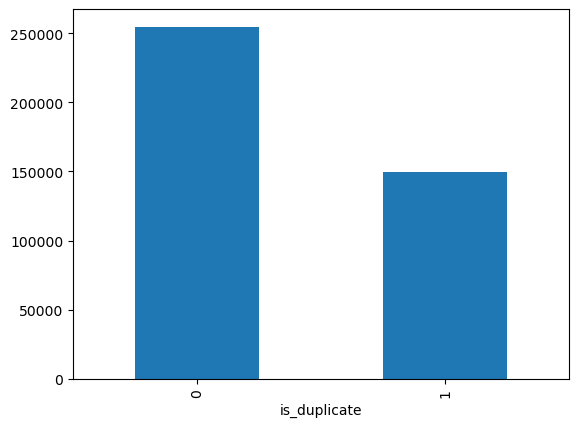

In [24]:
# Distribution of duplicate and non-duplicate questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate']. value_counts()/df ['is_duplicate']. count ()) *100)
df['is_duplicate']. value_counts(). plot (kind='bar')

In [26]:
#Repeated Questions

qid = pd. Series(df['qid1']. tolist() + df['qid2']. tolist())
print( 'Number of unique questions'
, np. unique (qid) .shape[0])
x = qid. value_counts ()>1
print( 'Number of questions getting repeated', x[x]. shape [0])

Number of unique questions 789154
Number of questions getting repeated 13675


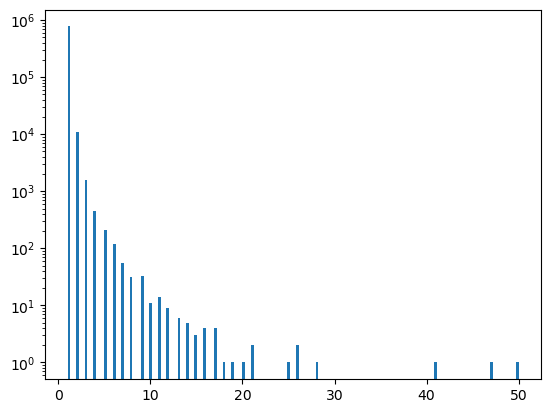

In [28]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()